In [81]:
import pickle
from pprint import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.lda import LDA
from sklearn.cluster import KMeans

from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, adjusted_rand_score
from sklearn.cross_validation import cross_val_score

import seaborn as sns

%matplotlib inline

Politics sentences per author:  
Sabrina Siddiqui 582  
Paul Lewis 678  
Tom McCarthy 576  
Dan Roberts 549  
Ben Jacobs 675  
Jeb Lund 520  

In [82]:
678.0/(582 + 678 + 576 + 549 + 675 + 520)

0.1893854748603352

Sports sentences per author:  
Michael Lewis 527  
Les Carpenter 826  
Graham Parker 430  
Guardian sport 419  
Joe Gorman 434  
DJ Gallo 553  
Russell Jackson 415  

In [83]:
826.0/(527 + 826 + 430 + 419 + 434 + 553 + 415)

0.22918978912319646

Science sentences per author:  
GrrlScientist 506  
Ian Sample 501  
Stuart Clark 464  

In [84]:
506.0 / (506 + 501 + 464)

0.34398368456832085

Arts sentences per author:  
Jonathan Jones 893  
Sean O'Hagan 561  
Judith Mackrell 1075  
Dorian Lynskey 459  

In [85]:
1075.0 / (893 + 561 + 1075 + 459)

0.35977242302543505

Sentences per topic:  
politics 3580  
arts 2988  
sports 3604  
science 1471  

In [86]:
3604.0/ (3580 + 2988 + 3604 + 1471)

0.3095422142059607

In [303]:
topic = "sports"

In [304]:
r_state = 8
#politics
#bestk = 6
#sports
bestk = 48
#science adv works better
#bestk = 4
#arts
#bestk = 10
#all
#bestk = 18

In [305]:
with open(topic+"_authors.pkl", 'r') as out_auths:
    authors = pickle.load(out_auths)
#with open(topic+"_features.pkl", 'r') as outs:
#    features = pickle.load(outs)
with open(topic+"_features.pkl", 'r') as outs:
    features = pickle.load(outs)
with open(topic+"_labels.pkl", 'r') as las:
    labels = pickle.load(las)

In [306]:
pprint(labels)

names = zip(*labels)[1]

pprint(names)

[(1, u'Joe Gorman'),
 (2, u'DJ Gallo'),
 (3, u'Russell Jackson'),
 (4, u'Graham Parker'),
 (5, u'Michael Lewis'),
 (6, u'Les Carpenter'),
 (7, u'Guardian sport')]
(u'Joe Gorman',
 u'DJ Gallo',
 u'Russell Jackson',
 u'Graham Parker',
 u'Michael Lewis',
 u'Les Carpenter',
 u'Guardian sport')


In [307]:
print len(authors)
print len(features)

3604
3604


In [308]:
print len(features[0])
print authors[0]

166
1


In [309]:
X_train, X_test, y_train, y_test = train_test_split(features, authors, test_size=0.25, random_state=r_state)

In [310]:
print len(X_train), len(X_test)
print len(y_train), len(y_test)

2703 901
2703 901


In [311]:
print type(y_train)
print y_train[0]

<type 'list'>
6


In [312]:
'''acc_k_score = []
ks = range(1,21)
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train) 
    predicted = knn.predict(X_test)
    acc = accuracy_score(y_test, predicted)
    acc_k_score.append(acc)
    print "k:", k, "acc:", acc'''

'acc_k_score = []\nks = range(1,21)\nfor k in ks:\n    knn = KNeighborsClassifier(n_neighbors=k)\n    knn.fit(X_train, y_train) \n    predicted = knn.predict(X_test)\n    acc = accuracy_score(y_test, predicted)\n    acc_k_score.append(acc)\n    print "k:", k, "acc:", acc'

In [313]:
models = {'logreg': LogisticRegression(),
          'rf': RandomForestClassifier(),
          'knn': KNeighborsClassifier(n_neighbors=bestk),
          'linsvc': LinearSVC(),
          'tree': DecisionTreeClassifier(),
          'gnb': GaussianNB(),
          'mnb': MultinomialNB(),
          'lda': LDA()
         }

pred_probs = {}
scores = {}
preds = {}

In [314]:
for mname, m in models.iteritems():
    print "*** %s" % mname
    m.fit(X_train, y_train)
    if mname != 'linsvc':
        pred_probs[mname] = {'train': m.predict_proba(X_train),  'test': m.predict_proba(X_test)}
    pred = m.predict(X_test)
    preds[mname] = pred
    prec, recall, fscore, sup = precision_recall_fscore_support(y_test, pred)
    scores[mname] = {'accuracy': accuracy_score(y_test, pred),
                     'precision': prec,
                     'recall': recall,
                     'fscore': fscore}

*** knn
*** gnb
*** rf
*** mnb
*** tree
*** lda
*** logreg
*** linsvc


In [315]:
pprint(scores)

{'gnb': {'accuracy': 0.17758046614872364,
         'fscore': array([ 0.27303754,  0.11111111,  0.06896552,  0.13913043,  0.11578947,
        0.00934579,  0.24438202]),
         'precision': array([ 0.21390374,  0.6       ,  0.17391304,  0.53333333,  0.23404255,
        0.2       ,  0.14285714]),
         'recall': array([ 0.37735849,  0.06122449,  0.04301075,  0.08      ,  0.07692308,
        0.00478469,  0.84466019])},
 'knn': {'accuracy': 0.32741398446170922,
         'fscore': array([ 0.21296296,  0.33333333,  0.08695652,  0.31313131,  0.30107527,
        0.4612326 ,  0.32      ]),
         'precision': array([ 0.20909091,  0.30994152,  0.13333333,  0.31632653,  0.30882353,
        0.39455782,  0.5106383 ]),
         'recall': array([ 0.21698113,  0.36054422,  0.06451613,  0.31      ,  0.29370629,
        0.55502392,  0.23300971])},
 'lda': {'accuracy': 0.40066592674805773,
         'fscore': array([ 0.33663366,  0.33438486,  0.24731183,  0.36464088,  0.3553719 ,
        0.52964427,

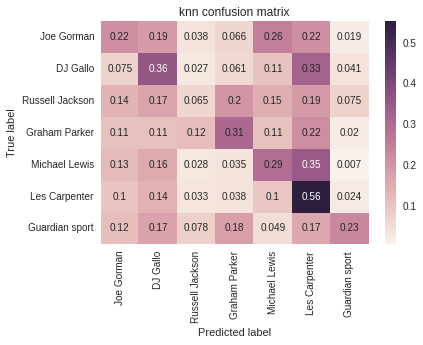

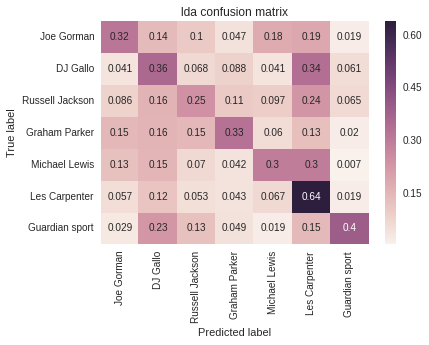

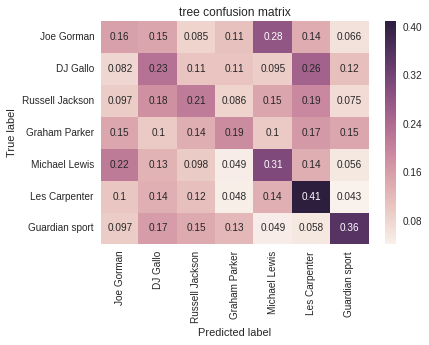

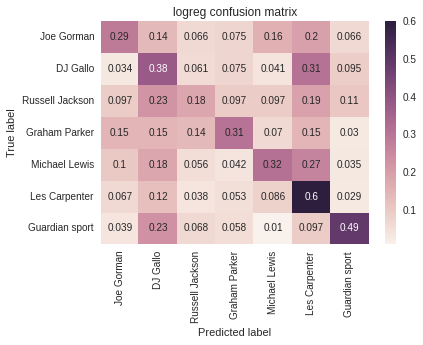

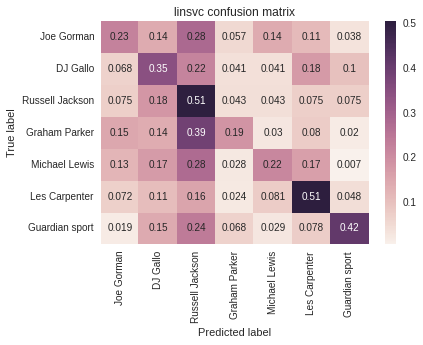

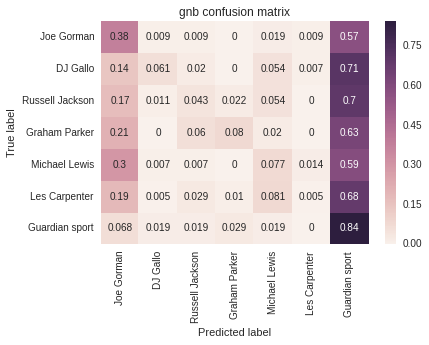

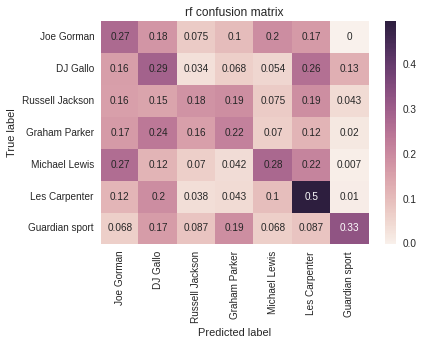

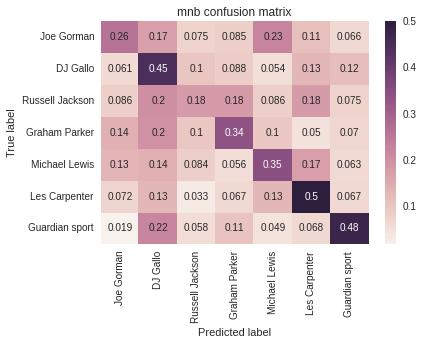

In [316]:
for mname, y_pred in preds.iteritems():
    cm = confusion_matrix(y_test, y_pred)
    cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 3)
    ax = sns.heatmap(cm, annot=True, xticklabels=names, yticklabels=names)
    plt.yticks(rotation=0) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title("%s confusion matrix" %mname)
    sns.plt.show()